# **Explorando as Taxas de Consumo de Álcool por Estudantes**

## Projeto da Disciplina **"Análise de Dados"** - Pós-graduação em Visão Computacional - CIn-UFPE.

 ### Aluno: Daniel Macedo

## **Sumário**

- **Introdução**
- **Da Importação das Bibliotecas**
- **Dados**
- **Análise para os Alunos de *Exatas***
- **Pré-Processamento e Análise Exploratória**
    - Ajustando os Dados
    - Considerações
    - Da Existência de Dados Nulos
    - Da Existência de Dados Duplicados
    - Normalização e Discretização
        - *Normalização*
        - *Discretização*
    - Remoção de Outliers com Z-Score Robusto
    - Remoção de Outliers com Tukey
    - *Remoção com Razão de Duas Variáveis (explicação)*
        - *Informação Extra*
- **Análise Exploratória e Estatística Descritiva dos Dados**
    - Seleção de Atributos
    - Como se Comportam a Média das Notas dos Estudantes
    - Correlação do Dados
    - Análise para Consumos Elevados
    
    

## **Introdução** 

![imagem](https://ichef.bbci.co.uk/news/800/cpsprodpb/8804/production/_119402843_gettyimages-184137051.jpg)

Imagem por Getty Images, em [BBC News](https://www.bbc.com/portuguese/geral-57853174).

O consumo de álcool por parte dos jovens é atualmente considerado um problema em decorrência das implicações que o mesmo pode ter no rendimento escolar dos alunos. Dessa forma, para uma análise mais aprofundada sobre o tema, foi escolhido um par de datasets que fornece informações de estudantes do que seria o ensino médio em escolas de Portugal, onde os estudantes buscaram ênfase nas áreas de exatas ou línguas. Os mesmos foram recolhidos no Kaggle no link (https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv) e a análise aqui descrita busca avaliar os efeitos nas notas dos alunos de **exatas** e os efeitos de alguns atributos no consumo de álcool.

## **Da importação das Bibliotecas**

As bibliotecas a serem utilizadas no projeto foram importadas e seguem abaixo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Os Dados**

A análise inicia-se por meio da importação dos arquivos com os datasets escolhidos.

In [2]:
mat_stud = pd.read_csv('student-mat.csv')
#por_stud = pd.read_csv('student-por.csv')

## **Análise Inicial Para os Alunos de Exatas**

In [3]:
mat_stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
mat_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Pode-se notar que o dataset possui diversos atributros que podem ser utilizados. No entanto, certas informações são conhecidas por serem mais relevantes no que concerne ao comportamento de jovens e estas serão analisadas.

## **Pré-Processamento e Análise Exploratória**

Para este trabalho, serão considerados apenas alguns fatores considerados preponderantes para analisarmos o perfil de consumo de álcool dos estudantes, tanto dos campos da matemática como do português. Isso se dá pelo fato de que os mesmos são tidos como bastante influentes no comportamento de jovens e seu perfil pessoal e educacional. Serão eles a serem tratados:
1. sex: Sexo (F - M) - cat
2. age: Idade (15 - 22)
3. Pstatus: Estado civil dos pais (T - Juntos; A - Separados) - cat
4. studytime: Tempo dedicado aos estudos semanalmente (1 - < 2 horas, 2 - 2 to 5 horas, 3 - 5 to 10 horas, or 4 - >10 horas)
5. failures: Número de reprovações (1 - 4) - cat
6. activities: Atividades extra-curriculares (yes / no) - bool
7. higher: Pretensão de cursar ensino superior (yes / no) - bool
8. internet: Acesso à internet (yes / no) - bool
9. famrel: Qualidade do relacionamento familiar (1 - muito ruim; 5 - muito bom) 
10. freetime: Tempo livre após a escola (1 - muito ruim; 5 - muito bom)
11. Dalc: Consumo diário de álcool (seg-sex) (1 - quase nenhum; 5 - muito elevado) - cat
12. Walc: Consumo de álcool aos finais de semana (1 - quase nenhum; 5 - muito elevado) - cat
13. G1, G2, G3: Notas dos períodos. (0 - 20)

As demais colunas com os demais fatores, por apresentarem uma relevância menor (o que não indica que seja inexistente), serão *dropadas* para fins de análise **neste** estudo.

In [3]:
mat_stud = mat_stud.drop(['school','address','famsize','Medu','Fedu',\
                          'Mjob','Fjob','reason','guardian','traveltime',\
                          'schoolsup','famsup','paid','nursery','romantic',\
                          'goout','health','absences'],axis=1)

In [6]:
mat_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   Pstatus     395 non-null    object
 3   studytime   395 non-null    int64 
 4   failures    395 non-null    int64 
 5   activities  395 non-null    object
 6   higher      395 non-null    object
 7   internet    395 non-null    object
 8   famrel      395 non-null    int64 
 9   freetime    395 non-null    int64 
 10  Dalc        395 non-null    int64 
 11  Walc        395 non-null    int64 
 12  G1          395 non-null    int64 
 13  G2          395 non-null    int64 
 14  G3          395 non-null    int64 
dtypes: int64(10), object(5)
memory usage: 46.4+ KB


In [11]:
mat_stud.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media
0,F,18,A,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Muito Baixo,5.67
1,F,17,T,Baixo,0,False,True,True,Muito Bom,Médio,Muito Baixo,Muito Baixo,5.33
2,F,15,T,Baixo,3,False,True,True,Bom,Médio,Baixo,Médio,8.33
3,F,15,T,Médio,0,True,True,True,Normal,Baixo,Muito Baixo,Muito Baixo,14.67
4,F,16,T,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Baixo,8.67


In [16]:
mat_stud.describe()

,age,studytime,failures,famrel,freetime,Dalc,Walc,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,3.944304,3.235443,1.481013,2.291139,10.908861,10.713924,10.415190
std,1.276043,0.839240,0.743651,0.896659,0.998862,0.890741,1.287897,3.319195,3.761505,4.581443
min,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,4.000000,3.000000,1.000000,1.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,0.000000,4.000000,3.000000,1.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,0.000000,5.000000,4.000000,2.000000,3.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,19.000000,19.000000,20.000000


### **Ajustando Dados**

Nesta seção, serão tratadas as informações para que se verifique a existência de dados duplicados e/ou ausentes e, assim, possa ser feito o tratamento (caso haja necessidade) por meio de imputação de outros valores atráves de média ou mediana, ou outro fator que venha a ser conveniente a depender do cenário. 

Abaixo tem-se a conversão dos tipos de atributos para categóricos, *booleanos* e numéricos (quando necessário).

In [4]:
# Retorna os valores como Verdadeiro ou Falso
def convert(item):
    if item == 'yes':
        return True
    elif item == 'no':
        return False

# Retorna os valores numéricos como textuais para facilitar a compreesão
def adjust(item):
    if item == 1:
        return 'Muito Baixo'
    elif item == 2:
        return 'Baixo'
    elif item == 3:
        return 'Médio'
    elif item == 4:
        return 'Elevado'
    elif item == 5:
        return 'Muito Elevado'

def adjustFamily(item):
    if item == 1:
        return 'Muito Ruim'
    elif item == 2:
        return 'Ruim'
    elif item == 3:
        return 'Normal'
    elif item == 4:
        return 'Bom'
    elif item == 5:
        return 'Muito Bom'

In [5]:
# Conversão dos atributos e aplicação de função para modificação dos valores.

mat_stud['sex'] = mat_stud['sex'].astype('category')
mat_stud['Pstatus'] = mat_stud['Pstatus'].astype('category')
mat_stud['Dalc'] = mat_stud['Dalc'].apply(adjust)
mat_stud['Walc'] = mat_stud['Walc'].apply(adjust)
mat_stud['activities'] = mat_stud['activities'].apply(convert)
mat_stud['higher'] = mat_stud['higher'].apply(convert)
mat_stud['internet'] = mat_stud['internet'].apply(convert)
mat_stud['famrel'] = mat_stud['famrel'].apply(adjustFamily)
mat_stud['studytime'] = mat_stud['studytime'].apply(adjust)
mat_stud['freetime'] = mat_stud['freetime'].apply(adjust)

In [6]:
# Conversão dos Atributos

mat_stud['Dalc'] = mat_stud['Dalc'].astype('category')
mat_stud['Walc'] = mat_stud['Walc'].astype('category')
mat_stud['famrel'] = mat_stud['famrel'].astype('category')
mat_stud['studytime'] = mat_stud['studytime'].astype('category')
mat_stud['freetime'] = mat_stud['freetime'].astype('category')

In [11]:
# Observação das Categorias
mat_stud.dtypes

sex           category
age              int64
Pstatus       category
studytime     category
failures         int64
activities        bool
higher            bool
internet          bool
famrel        category
freetime      category
Dalc          category
Walc          category
G1               int64
G2               int64
G3               int64
dtype: object

In [58]:
mat_stud.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media
0,F,18,A,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Muito Baixo,5.67
1,F,17,T,Baixo,0,False,True,True,Muito Bom,Médio,Muito Baixo,Muito Baixo,5.33
2,F,15,T,Baixo,3,False,True,True,Bom,Médio,Baixo,Médio,8.33
3,F,15,T,Médio,0,True,True,True,Normal,Baixo,Muito Baixo,Muito Baixo,14.67
4,F,16,T,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Baixo,8.67


In [60]:
# Averiguando assimetria dos Dados
mat_stud.skew()

age           0.466270
failures      2.387026
activities   -0.035584
higher       -4.114829
internet     -1.791595
media        -0.140516
dtype: float64

#### **Considerações**

Abaixo temos as categorias para os alunos com consumo diário (segunda a sexta) de bebidas de teor alcoólico. 
Entenda-se: 
- **Dalc**: **Consumo Diário (seg -  sex)**
- **Walc**: **Consumo aos finais de semana**

Para este estudo, será priorizada a análise para o consumo diário, dado que seus efeitos são considerados mais severos.

In [13]:
#Categorias de consumo diário

mat_stud['Dalc'].cat.categories

Index(['Baixo', 'Elevado', 'Muito Baixo', 'Muito Elevado', 'Médio'], dtype='object')

In [14]:
# Tamanho do dataset

mat_stud.shape

(395, 15)

#### **Da existência de Dados Nulos**

Averiguar-se-á a existência de elementos nulos. Caso existam, pode-se aplicar a função dropna() no dataset. A depender da quantidade, podemos remover colunas com menos 65% dos dados presentes. (thresh=0.65*len(mat_stud), axis=1). Essa consideração é feita pois com menos valores presentes de informações tidas como importantes pode afetar a análise dos dados.

In [15]:
print(mat_stud.isnull().sum())

sex           0
age           0
Pstatus       0
studytime     0
failures      0
activities    0
higher        0
internet      0
famrel        0
freetime      0
Dalc          0
Walc          0
G1            0
G2            0
G3            0
dtype: int64


Como não houve ocorrência de dados nulos, pode-se tomar as colunas como estão.

Dessa forma, também não se vê a necessidade de realizar a imputação de valores, seja por meio da média, mediana ou moda variável no dataset. 

Exemplo:
"mat_stud['age'].fillna(mat_stud['age'].mean(), inplace=True)"

#### **Da existência de Dados Duplicados**

Caso hajam dados duplicados, os mesmos poderão ser removidos para que não prejudiquem a análise dos dados.

In [19]:
mat_stud.sort_values(by=['age'], axis=0)

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,G1,G2,G3
130,F,15,T,Médio,2,False,True,True,Bom,Baixo,Baixo,Baixo,12,0,0
102,M,15,T,Muito Baixo,0,True,True,True,Muito Bom,Médio,Muito Baixo,Muito Baixo,10,13,14
103,F,15,T,Baixo,0,False,True,True,Bom,Médio,Muito Baixo,Muito Baixo,7,6,6
104,M,15,A,Baixo,0,True,True,True,Muito Bom,Elevado,Muito Baixo,Muito Baixo,16,18,18
105,F,15,A,Elevado,0,False,True,False,Bom,Médio,Muito Baixo,Muito Baixo,10,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,F,20,T,Médio,2,False,True,True,Muito Bom,Elevado,Muito Baixo,Muito Baixo,15,14,15
306,M,20,A,Muito Baixo,0,True,True,False,Muito Bom,Muito Elevado,Muito Baixo,Muito Baixo,17,18,18
390,M,20,A,Baixo,2,False,True,False,Muito Bom,Muito Elevado,Elevado,Muito Elevado,9,9,9
392,M,21,T,Muito Baixo,3,False,True,False,Muito Bom,Muito Elevado,Médio,Médio,10,8,7


In [20]:
# averiguando existência de dados duplicados

len(mat_stud.duplicated() == False)

395

Como observado, o dataset escolhido veio "*limpo*", o que facilita a análise, mas caso houvesse necessidade bastaria que, a depender da influência dos valores, os mesmos fossem removidos.

### **Normalização e Discretização**

A seguir, teremos algumas análises estatísticas para averiguar efeitos (caso sejam necessários) de normalização e discretização, bem como a limpeza (*caso exista a necessidade*) de forma univariada ou bivariada.

Como avaliado mais acima, alguns atributos dados como inteiros foram transformados para categóricos por meio de textos para facilitar a compreensão da leitura dos dados.

A princípio será feita uma adição de uma coluna **média** no dataset. Dessa forma, pode-se ter uma melhor noção da influência dos demais atributos nas notas dos alunos e também pode-se "*enxugar*" a tabela ao remover-se as notas individuais.

In [7]:
# adicionando uma coluna 'média' ao dataset para facilitar visualização de notas
mat_stud['media'] = round((mat_stud['G1'] + mat_stud['G2'] + mat_stud['G3'])/3, 2)

In [22]:
# Observação das médias no dataset
mat_stud['media'].describe()

count    395.000000
mean      10.679139
std        3.696912
min        1.330000
25%        8.330000
50%       10.670000
75%       13.330000
max       19.330000
Name: media, dtype: float64

In [8]:
# "Drop" das notas individuais
mat_stud = mat_stud.drop(['G1','G2','G3'],axis=1)

In [24]:
# Observando a idade dos estudantes
mat_stud['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [25]:
# Analisando o percentual do sexo dos Estudantes
mat_stud['sex'].value_counts() / mat_stud.shape[0]

F    0.526582
M    0.473418
Name: sex, dtype: float64

<ipython-input-9-879c853dfb7a>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  mat_stud.hist(ax = ax)


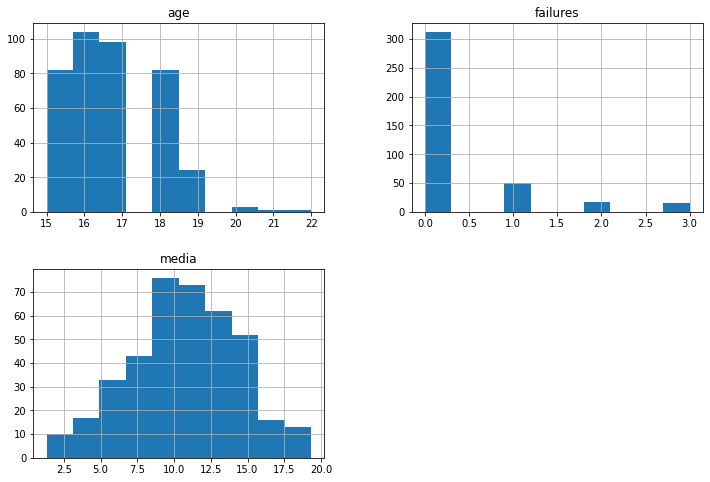

In [9]:
#Histograma dos dados presentes

fig = plt.figure(figsize = (12,8))
ax = fig.gca()
mat_stud.hist(ax = ax)
plt.show()

#### **Normalização**

Muitas vezes, ao se tomar um dataset, diferentes colunas de dados podem possuir escalas diferentes. A normalização possui como intuito a alteração de colunas numéricas em um conjunto de dados para valores similares, ou comuns, de forma a não distorcer as diferenças nos intervalos de valores, tratamento de outliers e também, a depender do caso e consequentemente, melhorar o desempenho de processos de otimização.

Para este caso de estudo, será feita a normalização por min-max (método comumente utilizado para normalização), onde os valores dos atributos idade ('age') e média ('media') são ajustados para o intervalo [0, 1]. 

In [27]:
def minmax_norm(item):
    return ((item - item.min()) / (item.max() - item.min()))

In [28]:
mat_stud_norm = mat_stud
mat_stud_norm['age'] = minmax_norm(mat_stud_norm['age'])
mat_stud_norm['media'] = minmax_norm(mat_stud_norm['media'])
mat_stud_norm.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media
0,F,0.428571,A,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Muito Baixo,0.241111
1,F,0.285714,T,Baixo,0,False,True,True,Muito Bom,Médio,Muito Baixo,Muito Baixo,0.222222
2,F,0.000000,T,Baixo,3,False,True,True,Bom,Médio,Baixo,Médio,0.388889
3,F,0.000000,T,Médio,0,True,True,True,Normal,Baixo,Muito Baixo,Muito Baixo,0.741111
4,F,0.142857,T,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Baixo,0.407778


In [29]:
mat_stud_norm.describe()

,age,failures,media
count,395.000000,395.000000,395.000000
mean,0.242315,0.334177,0.519397
std,0.182292,0.743651,0.205384
min,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.388889
50%,0.285714,0.000000,0.518889
75%,0.428571,0.000000,0.666667
max,1.000000,3.000000,1.000000


#### **Discretização**

Numa etapa de pré-processamento de dados a etapa de discretização é demasiada importante (a depender do cenário), pois se trata da transformação de variáveis e funções contínuas em contrapartes discretas. A depender dos algoritmos trabalhados, os valores de entrada precisam ser exclusivamente valores discretos. A discretização, então, gera um número finito de estados possíveis. A mesma pode ser supervisionada ou não-supervisionada.

Para o caso do presente estudo, pode-se discretizar tanto os valores das médias dos estudantes como os de suas idades. Dessa forma, serão discretizados os valores das médias em 4 valores iguais.

In [48]:
# Utilizando função da biblioteca pandas para separação
mat_stud['media_dist'] = pd.cut(mat_stud['media'],4)

In [41]:
mat_stud['media_dist'].value_counts()

(10.33, 14.83]    150
(5.83, 10.33]     146
(14.83, 19.33]     56
(1.312, 5.83]      43
Name: media_dist, dtype: int64

In [44]:
mat_stud.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media,media_dist
0,F,18,A,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Muito Baixo,5.67,"(1.312, 5.83]"
1,F,17,T,Baixo,0,False,True,True,Muito Bom,Médio,Muito Baixo,Muito Baixo,5.33,"(1.312, 5.83]"
2,F,15,T,Baixo,3,False,True,True,Bom,Médio,Baixo,Médio,8.33,"(5.83, 10.33]"
3,F,15,T,Médio,0,True,True,True,Normal,Baixo,Muito Baixo,Muito Baixo,14.67,"(10.33, 14.83]"
4,F,16,T,Baixo,0,False,True,False,Bom,Médio,Muito Baixo,Baixo,8.67,"(5.83, 10.33]"


Text(0, 0.5, 'Quantidade de Alunos')

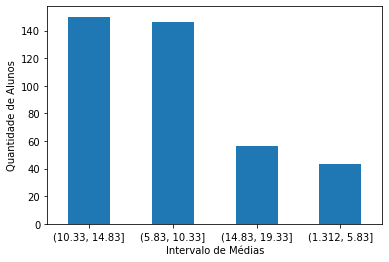

In [49]:
# Geração de gráfico de barras com os intervalos mostrados

counts = mat_stud['media_dist'].value_counts()
counts.plot.bar(rot=0)
plt.xlabel('Intervalo de Médias')
plt.ylabel('Quantidade de Alunos')

É possível ainda discretizar em áreas de intervalos iguais de elementos. Para as idades tem-se:

In [60]:
# Discretização com igual intervalo de elementos com outra função do Pandas
mat_stud['age_dist'] = pd.qcut(mat_stud['age'], 3)

In [61]:
mat_stud['age_dist'].value_counts()

(14.999, 16.0]    186
(17.0, 22.0]      111
(16.0, 17.0]       98
Name: age_dist, dtype: int64

Text(0, 0.5, 'Quantidade de Alunos')

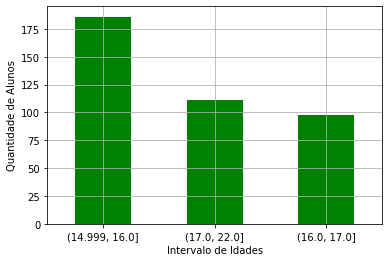

In [66]:
qcounts = mat_stud['age_dist'].value_counts()
qcounts.plot.bar(rot=0, color='g')
plt.grid()
plt.xlabel('Intervalo de Idades')
plt.ylabel('Quantidade de Alunos')

### **Remoção de Outliers com Z-Score Robusto (univariado)**

Durante as etapas de pré-processamento e análise exploratória, é fundamental tomar algumas medidas para aumentar a eficácia de um modelo que se deseja desenvolver, além daquelas apontadas mais acima, é importante identificar a presença de *outliers* nos dados e removê-los. 

Para auxiliar a identificar a presença de outliers usa-se a função *box plot*. É um método gráfico para percepção de variabilidade fora do intervalo interquartil. No presente estudo, os dados coletados apresentam-sem bem definidos e compactos, mas ao observamos os atributo da idade, percebemos uma distorção. 

Um método relativamente simples para remoção de outlier é o Z-Score, que é um intervalo de desvios-padrão de distância da média, por exemplo, dentro do qual os dados precisam se apresentar para serem considerados propriamente como pontos de estudo.

<AxesSubplot:>

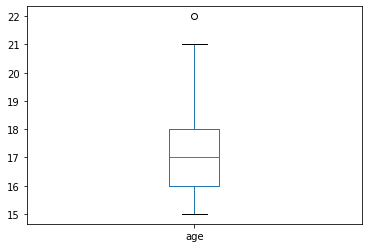

In [77]:
# método box-plot na idade
mat_stud['age'].plot.box()

Acima tem-se um exemplo de outlier univariado.

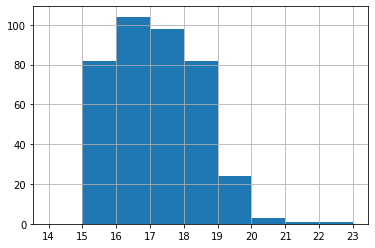

In [89]:
# Histograma dos dados de estudo [idade]

mat_stud['age'].hist(bins=[14,15,16,17,18,19,20,21,22,23])
plt.xticks([14,15,16,17,18,19,20,21,22,23])
plt.show()

Para esse caso, como o histograma das idades se assemelha a uma *gaussiana*, podemos iniciar a computar o Z-score robusto. Algumas informações na fórmula são necessárias esclarecer:
<div>
<img src="formula.jpg" width="200"/>
</div>

- O Median Absolute Deviation (MAD) computa a mediana da distância da diferença de todos os valores da mediana dos valores.

- A constante 0.675 é um fator de escala que torna o estimador acima não-enviesado em relação ao desvio-padrão (67.5% do σ)

- O Mi indica o limite do limiar. A partir desse ponto temos os outliers. Pode-se ser, por exemplo, 3 ou 3.5. Para este estudo, será adotado 3.

*É possível que o MAD calculado de forma manual seja diferente do calculado pela função da biblioteca. Em caso de divergência, prevalece a forma manual*

In [79]:
# MAD calculado de forma manual
mad = abs(mat_stud['age'] - mat_stud['age'].median()).median()*(1/0.6745)
print(mad)

1.4825796886582654


In [60]:
# MAD calculado pela biblioteca
mat_stud['age'].mad()

1.0708540298029205

<AxesSubplot:>

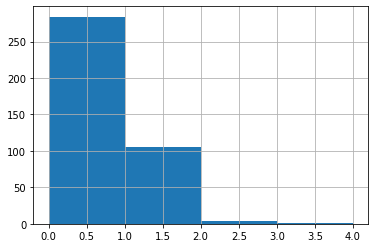

In [80]:
# Exibindo histograma do Z-Score Robusto
(abs(mat_stud['age'] - mat_stud['age'].median())/mad).hist(bins=[0,1,2,3,4])

In [86]:
# Outlier detectado em função da idade

mat_stud[abs(mat_stud['age'] - mat_stud['age'].median())/mad > 3]

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media
247,M,22,T,Muito Baixo,3,False,False,True,Muito Bom,Elevado,Muito Elevado,Muito Elevado,7.33


In [87]:
# Armazenam-se os demais valores em outro dataset, ou no mesmo, a depender dos estudos a serem feitos.

mat_stud_z_score = mat_stud[abs(mat_stud['age'] - mat_stud['age'].median())/mad < 3]
len(mat_stud_z_score)

394

### **Remoção de Outliers com o método de Tukey (univariado)**

Uma outra forma de se identificar a presença de outliers é por meio do método de *Tukey*. É um método gráfico para percepção de variabilidade fora do intervalo interquartil. É preciso que a distribuição seja simétrica. 

Considera-se *outlier* os valores menores que (Q1 - 1.5 * IQR) e maiores que (Q3 + 1.5 * IQR), onde IQR é o intervalo interquartil.

Baseando-se na distribuição normal feita anteriormente, tomam-se os valores de intervalo para cálculo do IQR.

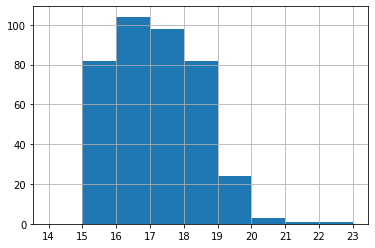

In [90]:
mat_stud['age'].hist(bins=[14,15,16,17,18,19,20,21,22,23])
plt.xticks([14,15,16,17,18,19,20,21,22,23])
plt.show()

In [91]:
# Cálculo dos intervalos e valor do IQR

q1 = mat_stud['age'].quantile(q=0.25)
q3 = mat_stud['age'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

2.0


In [93]:
# Identificação de outliers abaixo do intervalo.
mat_stud[mat_stud['age'] < (q1-1.5*iqr)]

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media


In [96]:
# Identificação de outliers acima do intervalo
mat_stud[mat_stud['age'] > (q3+1.5*iqr)]

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media
247,M,22,T,Muito Baixo,3,False,False,True,Muito Bom,Elevado,Muito Elevado,Muito Elevado,7.33


In [101]:
# Salvando valores sem outliers em novo dataset

mat_stud_tukey = mat_stud[(mat_stud['age'] > (q1-1.5*iqr)) & (mat_stud['age'] < (q3+1.5*iqr))]
len(mat_stud_tukey)

393

Como é possível notar, não há a presença de outliers abaixo do intervalo (por esse método).

### **Remoção de Outliers usando Razão de Duas Variáveis (Bivariado)**

Para este presente estudo não se faz necessário a identificação de outliers por este método devido ao escopo de estudo e dados encontrados. No entanto, caso fosse preciso, bastaria converter um par de variáveis para uma outra de interesse e então aplicar os métodos univariados apontados anteriormente.

#### **Informação Extra**

De forma a trazer maior clareza das informações, é possível suavizar determinados gráficos ou histrogramas por meio de função logarítmica para que se pareçam mais com distribuições normais e assim seja possível determinar certas operações. No entanto, nem sempre a função *log* vai ser adequada, ou mesmo alguma função menos complexa, de forma que talvez seja necessário observar análises de outras variáveis.

In [242]:
# Suavização para médias por meio de log10
mat_stud_log = pd.DataFrame()  
mat_stud_log['log_media'] = mat_stud['media'].apply(np.log10)

<AxesSubplot:>

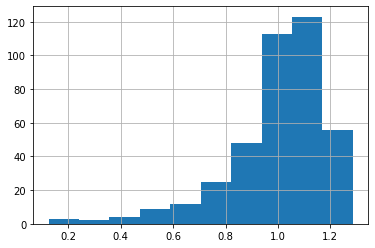

In [244]:
mat_stud_log['log_media'].hist()

Para o caso da tentativa de suavização das idadas, deparamo-nos com um problema devido a gaps nas informações recolhidas.

<AxesSubplot:>

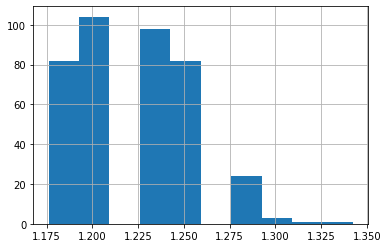

In [247]:
# Suavização para idades por meio de log10
mat_stud_log['log_age'] = mat_stud['age'].apply(np.log10)
mat_stud_log['log_age'].hist()

## **Análise Exploratória e Estatística Descritiva dos Dados**

A partir das informações acima, e também dos dados encontrados no dataset, é possível extrair informações e deduzir algumas inferências.

A partir das análises, tentar-se-á descobrir pistas como:

- **Influência do consumo de álcool nas médias de notas**
- **Perfil de idade de consumo**
- **Descrição do consumo e consequência com as notas por gênero**
- **Correlação de Algumas Variáveis**


### **Seleção de Atributos**

Para a análise, serão avaliados como os hábitos dos estudantes no consumo diário de álcool tidos como elevado e muito elevado influenciam a média de suas notas e se esses consumos são influenciados por outros fatores.

Nota-se que podem ser feitos inúmeros tipos de investigações em cima dos dados, de forma que algumas das análises feitas neste estudo se aprensentam apenas como uma pequena parcela de possibilidades que podem ser desenvolvidas, mas dado ao tempo e ao foco do mesmo, foram limitadas as investigações àquelas feitas no estudo.

A princípio, um novo dataset com esses estudantes será selecionado.

In [9]:
# Observando o consumo de álcool dos estudantes
mat_stud['Dalc'].value_counts()

Muito Baixo      276
Baixo             75
Médio             26
Elevado            9
Muito Elevado      9
Name: Dalc, dtype: int64

Text(0, 0.5, 'Estudantes')

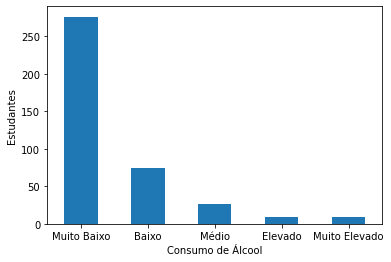

In [11]:
#Verificação visual do consumo de álcool por estudantes durante a semana

counts = mat_stud['Dalc'].value_counts()
counts.plot.bar(rot=0)
plt.xlabel("Consumo de Álcool")
plt.ylabel("Estudantes")

Nota-se que grande parte dos estudantes optam por não consumir em grandes quantidades o álcool diariamente.
Existem também os valores consumidos aos finais de semana. Como, em tese, os finais de semana são destinados ao lazer e tempo livre, não serão considerados a priori muitas análises para esse cenário.

In [12]:
# Número de estudantes que consomem álcool diariamente
mat_stud['Walc'].value_counts()

Muito Baixo      151
Baixo             85
Médio             80
Elevado           51
Muito Elevado     28
Name: Walc, dtype: int64

Text(0, 0.5, 'Estudantes')

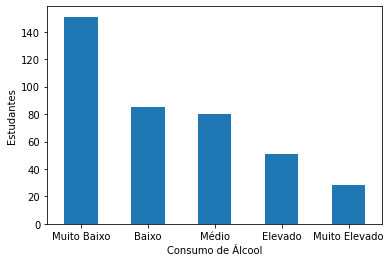

In [14]:
#Verificação visual do consumo de álcool por estudantes durante o final de semana

wcounts = mat_stud['Walc'].value_counts()
wcounts.plot.bar(rot=0)
plt.xlabel("Consumo de Álcool")
plt.ylabel("Estudantes")

#### **Como se comportam as médias das notas dos estudantes?**

- Uma primeira análise nos permite averiguar como se comportam a média das notas dos estudantes a partir dos hábitos de consumo.

Text(0, 0.5, 'Média de Notas')

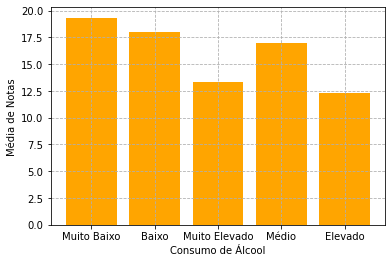

In [27]:
# Amostra visível das notas dos alunos com seus hábitos de consumo
plt.bar(mat_stud['Dalc'],mat_stud['media'],color='orange')
plt.grid(True, linestyle='--')
plt.xlabel('Consumo de Álcool')
plt.ylabel('Média de Notas')

Como é possível notar, as médias de notas dos alunos que consomem bastante álcool tende a ser menor do que as de alunos que consomem menos.

- Com outras análises é possível observar a relação do consumo de álcool com idades, relacionamento familiar, tempo livre e a acesso à internet, tempo de estudo e situação conjugal dos pais.

**Perfil por *Idade***

In [47]:
# Contagem de estudantes por idade
mat_stud['age'].value_counts()

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

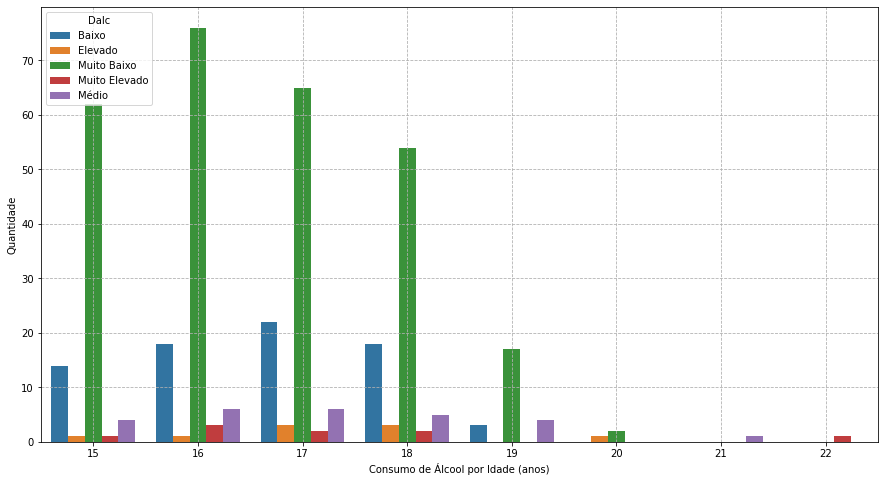

In [50]:
# Amostra visível das idades dos alunos com seus hábitos de consumo
plt.figure(figsize=(15,8))
sns.countplot(mat_stud['age'],hue = mat_stud['Dalc'])
plt.grid(True, linestyle='--')
plt.xlabel('Consumo de Álcool por Idade (anos)')
plt.ylabel('Quantidade')
plt.show()

Como é possível observar, são muitos os estudantes com pouco ou nenhum hábito de consumo, mas mesmo assim nota-se a presença de alunos com consumos consideráveis de álcool menores de 18 anos.

**Perfil por *Relacionamento Familiar***

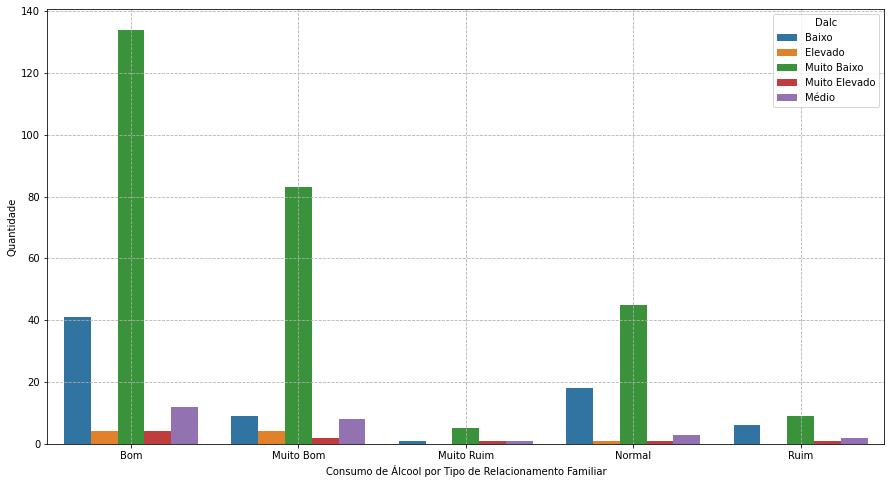

In [88]:
# Amostra visível do relacionamento familiar dos alunos com seus hábitos de consumo

plt.figure(figsize=(15,8))
sns.countplot(mat_stud['famrel'],hue = mat_stud['Dalc'])
plt.grid(True, linestyle='--')
plt.xlabel('Consumo de Álcool por Tipo de Relacionamento Familiar')
plt.ylabel('Quantidade')
plt.show()

É possível notar que em relacionamentos familiares tidos como "bons", o consumo de álcool é reduzido semanalmente.

**Perfil por *Tempo Livre***

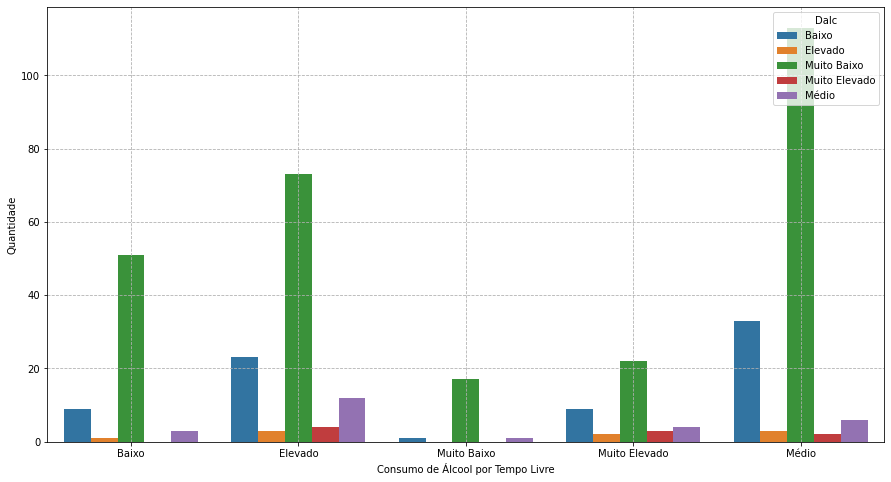

In [89]:
# Amostra visível do tempo livre dos alunos com seus hábitos de consumo

plt.figure(figsize=(15,8))
sns.countplot(mat_stud['freetime'],hue = mat_stud['Dalc'])
plt.grid(True, linestyle='--')
plt.xlabel('Consumo de Álcool por Tempo Livre')
plt.ylabel('Quantidade')
plt.show()

Nota-se, ainda que de forma sutil, que estudantes com menos tempo livre, tendem a consumir menos álcool.

**Perfil por *Acesso à Internet***

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


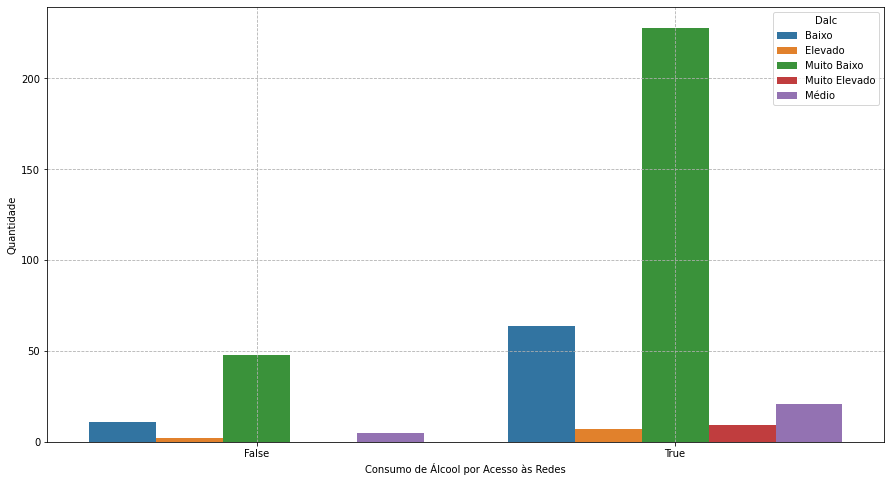

In [93]:
# Amostra visível dos alunos com acesso à internet e seus hábitos de consumo

plt.figure(figsize=(15,8))
sns.countplot(mat_stud['internet'],hue = mat_stud['Dalc'])
plt.grid(True, linestyle='--')
plt.xlabel('Consumo de Álcool por Acesso às Redes')
plt.ylabel('Quantidade')
plt.show()

Nota-se que muitos estudantes que não consomem (ou consomem muito pouco álcool), tem acesso à internet.

**Perfil por *Tempo Aplicado aos Estudos***

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


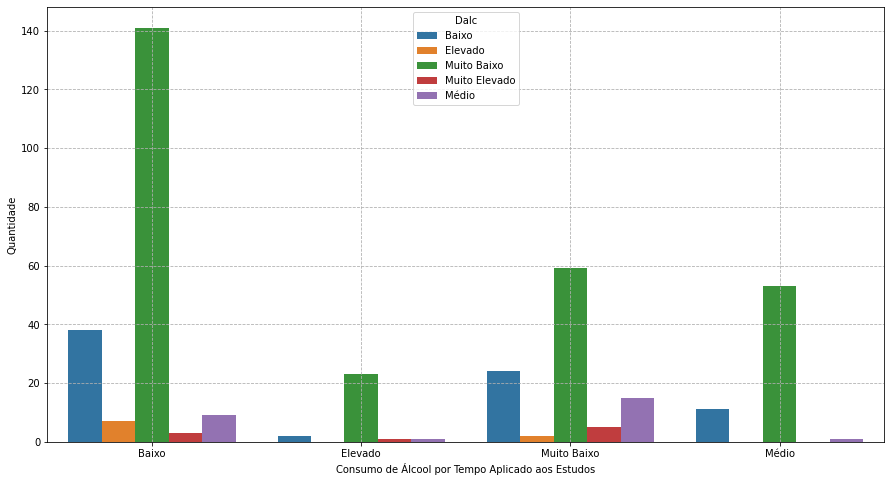

In [94]:
# Amostra visível do tempo aplicado aos estudos dos alunos com seus hábitos de consumo

plt.figure(figsize=(15,8))
sns.countplot(mat_stud['studytime'],hue = mat_stud['Dalc'])
plt.grid(True, linestyle='--')
plt.xlabel('Consumo de Álcool por Tempo Aplicado aos Estudos')
plt.ylabel('Quantidade')
plt.show()

Apesar de não muito claro, a princípio, vê-se que estudantes tendem a consumir mais álcool quando o tempo dedicado aos estudos é menor.

**Perfil por *Relação Parental***

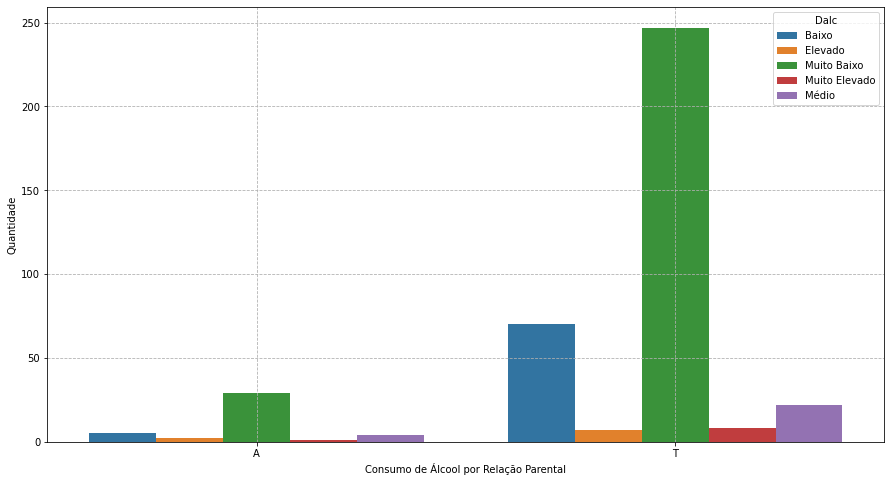

In [96]:
# Amostra visível da relação parental dos alunos com seus hábitos de consumo

plt.figure(figsize=(15,8))
sns.countplot(mat_stud['Pstatus'],hue = mat_stud['Dalc'])
plt.grid(True, linestyle='--')
plt.xlabel('Consumo de Álcool por Relação Parental')
plt.ylabel('Quantidade')
plt.show()

Nota-se, de forma superficial, que alunos com os pais casados tendem a consumir menos álcool.

- Análise para com relação ao sexo dos estudantes

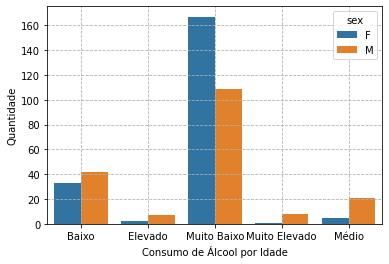

In [49]:
# Gráfico de barras sobre o consumo por sexo

sns.countplot(mat_stud['Dalc'],hue = mat_stud['sex'])
plt.grid(True, linestyle='--')
plt.xlabel('Consumo de Álcool por Idade')
plt.ylabel('Quantidade')
plt.show()

Dos estudantes que consomem nenhum ou pouco álcool semanalmente, as mulheres tendem a consumir menos, enquanto os homens tendem a consumir mais.

De maneira mais geral, podemos analisar o comportamento dos dados quando comparamos os níveis de consumo dos alunos com as médias das idades e de notas dos mesmos. Tem-se a seguir:

In [54]:
# Exibição de perfil de consumo agrupado por média de idade e de notas
mat_stud.groupby('Dalc').agg({'age':'mean','media':'mean'}).dropna()

,age,media
Dalc,,
Baixo,16.706667,9.858000
Elevado,17.333333,9.813333
Muito Baixo,16.615942,10.945362
Muito Elevado,17.222222,10.628889
Médio,17.115385,10.538846


Ou, traduzindo as informações acima para o formato de um gráfico, tem-se que:

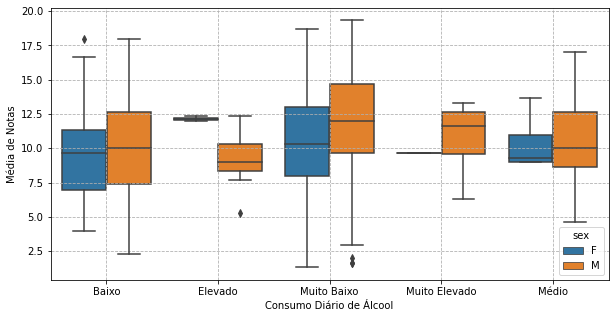

In [57]:
# Gráfico boxplot indicando consumo de álcool por sexo e a influência nas notas

plt.figure(figsize=(10,5))
sns.boxplot(x=mat_stud['Dalc'], y=mat_stud['media'], hue=mat_stud['sex'])
plt.xlabel('Consumo Diário de Álcool')
plt.ylabel('Média de Notas')
plt.grid(True, linestyle='--')
plt.show()

*A partir da imagem acima, pode-se notar a presença de *outliers* para determinados conjuntos, o que, a depender da análise, poderia implicar a necessidade de um pré-processamento e remoção de outliers pelo Z-Score (não convém no momento).*

Além disso, para o gráfico acima, nota-se que em geral as notas dos estudantes do sexo masculino *tendem* a ser maiores do que as dos estudantes do sexo feminino. Nota-se também que indivíduos que consomem menos álcool, também *tendem* a ter um perfil de notas melhores do que os demais. Percebe-se ainda que o número de homens que exageram no consumo de álcool é maior que o número de mulheres que fazem o mesmo.

#### **Correlação dos Dados**

Por meio da correlação é possível identificar a interdependência entre duas ou mais variáveis do estudo. Por diversas vezes essa correlação é vista de maneira imediata. No entanto, em muitas outras faz-se necessária a utilização de métodos que possam fazer essa averiguação.

**DESTAQUE:** *CORRELAÇÃO != CAUSALIDADE*

**Coeficiente de Correlação de Pearson**
    Conhecido como coeficiente de correção produto-momento, ele mede o grau de correlação (e se é positiva ou negativa) entre duas variáveis, normalizando a covariância pelo desvio-padrão dos atributos. Tal coeficiente é dado no intervalo [-1, 1]. É o método mais indicado para relações lineares. Para o estudo, serão consideradas apenas as variáveis númericas (como exemplo), pois as categóricas não se encaixam nas funções.

In [70]:
# Por default, a correlação presente na função do Pandas é a de Pearson

mat_stud.corr()

,age,failures,activities,higher,internet,media
age,1.000000,0.243665,-0.103063,-0.209081,-0.112094,-0.134566
failures,0.243665,1.000000,-0.069341,-0.300316,-0.063451,-0.375702
activities,-0.103063,-0.069341,1.000000,0.096484,0.048663,0.040808
higher,-0.209081,-0.300316,0.096484,1.000000,0.020374,0.189434
internet,-0.112094,-0.063451,0.048663,0.020374,1.000000,0.102565
media,-0.134566,-0.375702,0.040808,0.189434,0.102565,1.000000


<AxesSubplot:>

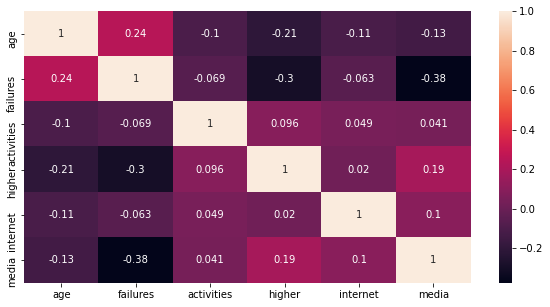

In [82]:
# Mapa de Calor das correlações

plt.figure(figsize=(10,5))
sns.heatmap(mat_stud.corr(),annot=True)

**Coeficiente de Correlação de Spearman**
    Já esse coeficiente é indicado na correlação entre um par de variáveis relacionados monotonicamente entre si, não necessariamente de maneira linear. Para este método, ao invés de serem tomados os valores originais dos pontos de dados, são tomados os valores que as variáveis possuem em um ordenamento numérico (do menor para o maior, em dados e, em ordenamento, [1, último valor]. 

In [74]:
# Aplicação da Correlação de Spearman

mat_stud.corr('spearman')

,age,failures,activities,higher,internet,media
age,1.000000,0.236464,-0.093945,-0.191907,-0.098546,-0.135749
failures,0.236464,1.000000,-0.047777,-0.264547,-0.080983,-0.368273
activities,-0.093945,-0.047777,1.000000,0.096484,0.048663,0.038879
higher,-0.191907,-0.264547,0.096484,1.000000,0.020374,0.178821
internet,-0.098546,-0.080983,0.048663,0.020374,1.000000,0.105511
media,-0.135749,-0.368273,0.038879,0.178821,0.105511,1.000000


<AxesSubplot:>

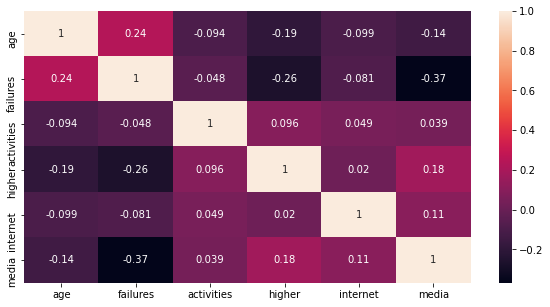

In [83]:
# Mapa de Calor das correlações

plt.figure(figsize=(10,5))
sns.heatmap(mat_stud.corr('spearman'),annot=True)

### **Análise para Consumos Elevados**

Apesar das análises mais gerais, muitas vezes é preciso realizar obsevações mais específicas a respeito do fenômeno que se deseja compreender. Dito isso, serão selecionados dois conjuntos de dados derivados do conjunto principal que serão divididos entre os estudantes que consomem mais dos que consomem medianamente e menos álcool.

In [77]:
# Seleção dos grupos de estudantes

amostra_mat = mat_stud.loc[(mat_stud['Dalc'] == 'Muito Elevado') | (mat_stud['Dalc'] == 'Elevado')]
amostra_s_mat = mat_stud.loc[(mat_stud['Dalc'] == 'Médio') | (mat_stud['Dalc'] == 'Baixo') | (mat_stud['Dalc'] == 'Muito Baixo')]

In [79]:
amostra_mat.describe()

,age,failures,media
count,18.000000,18.000000,18.000000
mean,17.277778,0.444444,10.221111
std,1.708303,0.855585,2.401281
min,15.000000,0.000000,5.330000
25%,16.000000,0.000000,9.000000
50%,17.000000,0.000000,10.665000
75%,18.000000,0.750000,12.330000
max,22.000000,3.000000,13.330000


In [81]:
amostra_s_mat.describe()

,age,failures,media
count,377.000000,377.000000,377.000000
mean,16.668435,0.328912,10.701008
std,1.247928,0.738772,3.748361
min,15.000000,0.000000,1.330000
25%,16.000000,0.000000,8.330000
50%,17.000000,0.000000,10.670000
75%,18.000000,0.000000,13.330000
max,21.000000,3.000000,19.330000


A partir dessas informações pré-eliminares, é possível notar as seguintes características (para ambos os sexos): 
- Os estudantes que consomem bastante álcool representam aproximadamente 5% do total de estudantes; 
- A média de idade dos "*consumistas*" é maior do que a dos demais [17.27 > 16.67];
- O número de reprovações dos consumistas é levemente maior que dos demais [0.44 > 0.33];
- A média de notas dos "*consumistas*" é menor também que a dos demais estudantes.


In [84]:
amostra_mat.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media
29,M,16,T,Baixo,0,True,True,True,Bom,Elevado,Muito Elevado,Muito Elevado,11.00
54,F,15,A,Muito Baixo,0,False,True,True,Muito Bom,Médio,Elevado,Elevado,12.00
61,F,16,T,Muito Baixo,0,True,True,True,Muito Bom,Muito Elevado,Muito Elevado,Muito Elevado,9.67
66,M,15,A,Elevado,0,True,True,True,Muito Ruim,Médio,Muito Elevado,Muito Elevado,12.67
100,M,16,T,Muito Baixo,0,True,True,True,Bom,Muito Elevado,Muito Elevado,Muito Elevado,6.33


**---------------------------------------------------------------------**

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'failures'}>],
       [<AxesSubplot:title={'center':'media'}>, <AxesSubplot:>]],
      dtype=object)

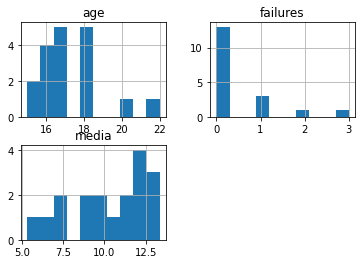

In [136]:
amostra_mat.hist()

In [134]:
amostra_mat.head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,media
29,M,16,T,Baixo,0,True,True,True,Bom,Elevado,Muito Elevado,Muito Elevado,11.00
54,F,15,A,Muito Baixo,0,False,True,True,Muito Bom,Médio,Elevado,Elevado,12.00
61,F,16,T,Muito Baixo,0,True,True,True,Muito Bom,Muito Elevado,Muito Elevado,Muito Elevado,9.67
66,M,15,A,Elevado,0,True,True,True,Muito Ruim,Médio,Muito Elevado,Muito Elevado,12.67
100,M,16,T,Muito Baixo,0,True,True,True,Bom,Muito Elevado,Muito Elevado,Muito Elevado,6.33


In [115]:
amostra_s_mat.describe()

,age,failures,media
count,377.000000,377.000000,377.000000
mean,16.668435,0.328912,10.701008
std,1.247928,0.738772,3.748361
min,15.000000,0.000000,1.330000
25%,16.000000,0.000000,8.330000
50%,17.000000,0.000000,10.670000
75%,18.000000,0.000000,13.330000
max,21.000000,3.000000,19.330000


C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


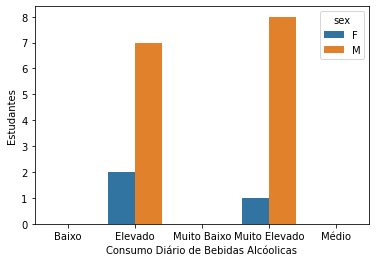

In [126]:
sns.countplot(amostra_mat['Dalc'],hue = amostra_mat['sex'])
plt.xlabel('Consumo Diário de Bebidas Alcóolicas')
plt.ylabel('Estudantes')
plt.show()

In [132]:
# Médias de idade e notas dos consumidores assíduos
amostra_mat.groupby('Dalc').agg({'age':'mean','media':'mean'}).dropna()

,age,media
Dalc,,
Elevado,17.333333,9.813333
Muito Elevado,17.222222,10.628889


In [28]:
# Percentual de estudantes com consumos elevados

pct_mat = amostra_mat

<ipython-input-118-920cd3d2b3dc>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  amostra_mat.hist(ax = ax)


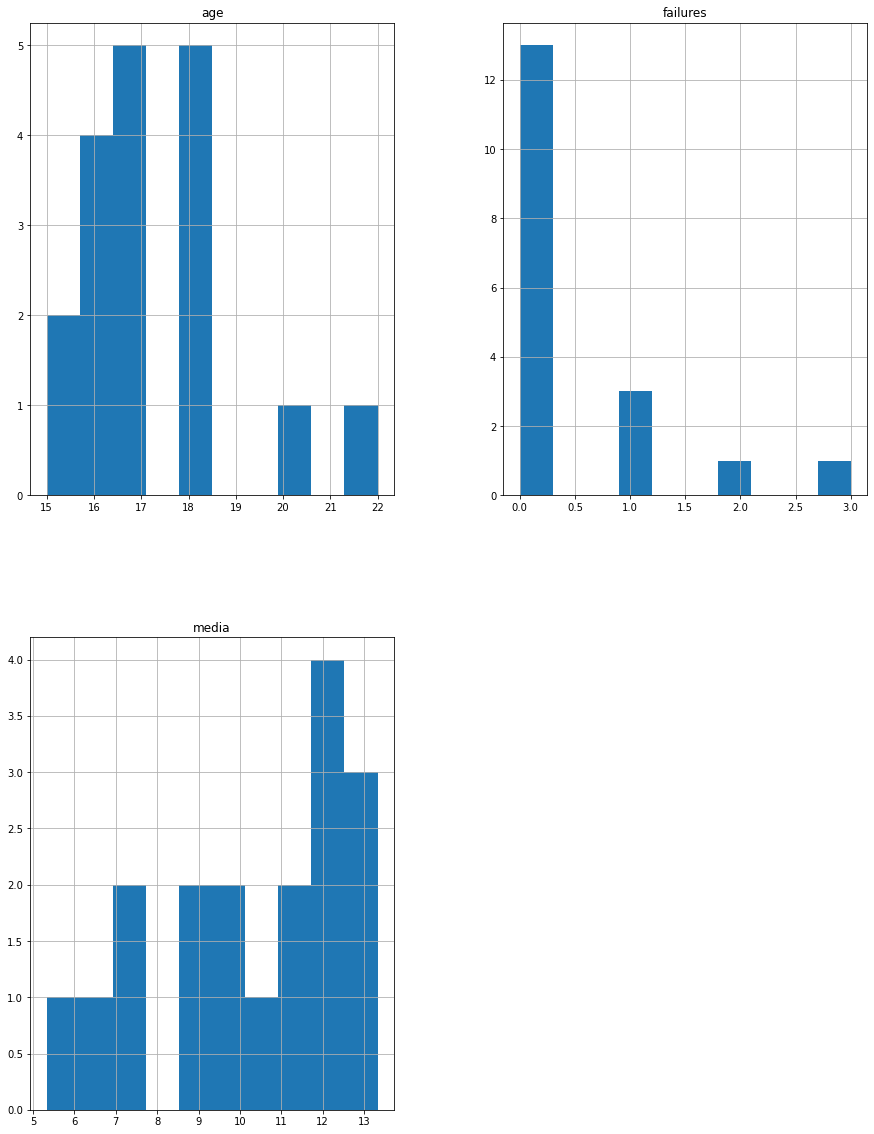

In [118]:
# Histograma dos dados para este conjunto
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
amostra_mat.hist(ax = ax)
plt.show()

#### Comparativo de todos os atributos

Comparação de dados de consumo entre todos os estudantes

In [130]:
# Médias de idade e nptas de consumo
mat_stud.groupby('Dalc').agg({'age':'mean','media':'mean'})

,age,media
Dalc,,
Baixo,16.706667,9.858000
Elevado,17.333333,9.813333
Muito Baixo,16.615942,10.945362
Muito Elevado,17.222222,10.628889
Médio,17.115385,10.538846


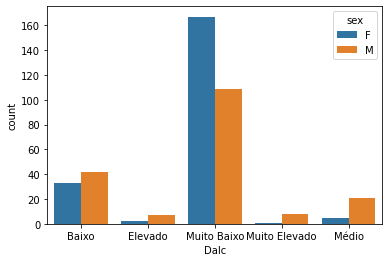

In [71]:
sns.countplot(mat_stud['Dalc'],hue = mat_stud['sex'])
plt.show()

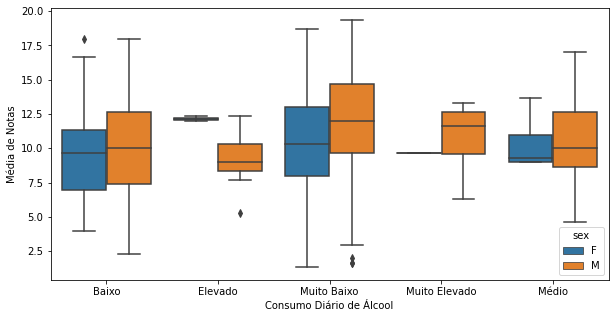

In [124]:
plt.figure(figsize=(10,5))
sns.boxplot(x=mat_stud['Dalc'], y=mat_stud['media'], hue=mat_stud['sex'])
plt.xlabel('Consumo Diário de Álcool')
plt.ylabel('Média de Notas')
plt.show()

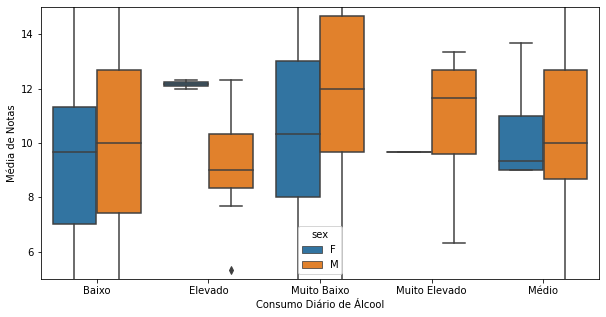

In [125]:
plt.figure(figsize=(10,5))
sns.boxplot(x=mat_stud['Dalc'], y=mat_stud['media'], hue=mat_stud['sex'])
plt.xlabel('Consumo Diário de Álcool')
plt.ylabel('Média de Notas')
plt.ylim(5,15)
plt.show()

In [119]:
mat_stud.describe()

,age,failures,G1,G2,G3,media
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,0.334177,10.908861,10.713924,10.415190,10.679139
std,1.276043,0.743651,3.319195,3.761505,4.581443,3.696912
min,15.000000,0.000000,3.000000,0.000000,0.000000,1.330000
25%,16.000000,0.000000,8.000000,9.000000,8.000000,8.330000
50%,17.000000,0.000000,11.000000,11.000000,11.000000,10.670000
75%,18.000000,0.000000,13.000000,13.000000,14.000000,13.330000
max,22.000000,3.000000,19.000000,19.000000,20.000000,19.330000


In [120]:
# dados de estudantes com consumo elevado de álcool
mat_stud[mat_stud['Walc'] == 'Elevado'].head()

,sex,age,Pstatus,studytime,failures,activities,higher,internet,famrel,freetime,Dalc,Walc,G1,G2,G3,media
18,M,17,T,Muito Baixo,3,True,True,True,Muito Bom,Muito Elevado,Baixo,Elevado,6,5,5,5.33
23,M,16,T,Baixo,0,True,True,True,Muito Bom,Elevado,Baixo,Elevado,13,13,12,12.67
27,M,15,T,Muito Baixo,0,False,True,True,Ruim,Baixo,Baixo,Elevado,15,16,15,15.33
30,M,15,T,Baixo,0,False,True,True,Muito Bom,Elevado,Médio,Elevado,9,11,12,10.67
41,M,15,T,Muito Baixo,0,False,True,True,Muito Bom,Elevado,Baixo,Elevado,12,12,12,12.00


In [54]:
# Avaliando relação de consumo diária com tipo de união parental
mat_stud[mat_stud['Dalc'] == 'Muito Elevado']['Pstatus'].value_counts()

T    8
A    1
Name: Pstatus, dtype: int64

In [122]:
# média de idade dos estudantes que consomem álcool diariamente com valores elevados e muito elevados
melev = mat_stud[mat_stud['Dalc'] == 'Muito Elevado']['age'].mean()
elev = mat_stud[mat_stud['Dalc'] == 'Elevado']['age'].mean()

mediaConsD = round((melev + elev)/2,2)
mediaConsD

17.28

In [121]:
mat_stud[mat_stud['Dalc'] == 'Muito Elevado'].describe()

,age,failures,G1,G2,G3,media
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,17.222222,0.444444,10.444444,10.777778,10.666667,10.628889
std,2.048034,1.013794,2.603417,2.538591,2.692582,2.475674
min,15.000000,0.000000,6.000000,7.000000,5.000000,6.330000
25%,16.000000,0.000000,10.000000,8.000000,10.000000,9.670000
50%,17.000000,0.000000,11.000000,12.000000,11.000000,11.000000
75%,18.000000,0.000000,12.000000,13.000000,13.000000,12.670000
max,22.000000,3.000000,14.000000,13.000000,13.000000,13.330000


In [123]:
mat_stud_s_notas = mat_stud.drop(['G1','G2','G3'],axis=1)
mat_stud_s_notas.corr()

,age,failures,activities,higher,internet,media
age,1.000000,0.243665,-0.103063,-0.209081,-0.112094,-0.134566
failures,0.243665,1.000000,-0.069341,-0.300316,-0.063451,-0.375702
activities,-0.103063,-0.069341,1.000000,0.096484,0.048663,0.040808
higher,-0.209081,-0.300316,0.096484,1.000000,0.020374,0.189434
internet,-0.112094,-0.063451,0.048663,0.020374,1.000000,0.102565
media,-0.134566,-0.375702,0.040808,0.189434,0.102565,1.000000


selecionar dados elevado e muito elevado

In [95]:
amostra = mat_stud.loc[(mat_stud['Dalc'] == 'Muito Elevado') | (mat_stud['Dalc'] == 'Elevado')]
amostra.describe()

,age,studytime,famrel,freetime,G1,G2,G3,media
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,17.277778,1.722222,3.944444,3.888889,10.111111,10.277778,10.277778,10.221111
std,1.708303,0.751904,1.109967,0.900254,2.446820,2.562296,2.607806,2.401281
min,15.000000,1.000000,1.000000,2.000000,6.000000,5.000000,5.000000,5.330000
25%,16.000000,1.000000,4.000000,3.000000,9.250000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,4.000000,4.000000,10.000000,11.000000,11.000000,10.665000
75%,18.000000,2.000000,5.000000,4.750000,11.750000,12.750000,12.750000,12.330000
max,22.000000,4.000000,5.000000,5.000000,14.000000,13.000000,13.000000,13.330000


<ipython-input-117-860663163c6e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  amostra.hist(ax = ax)


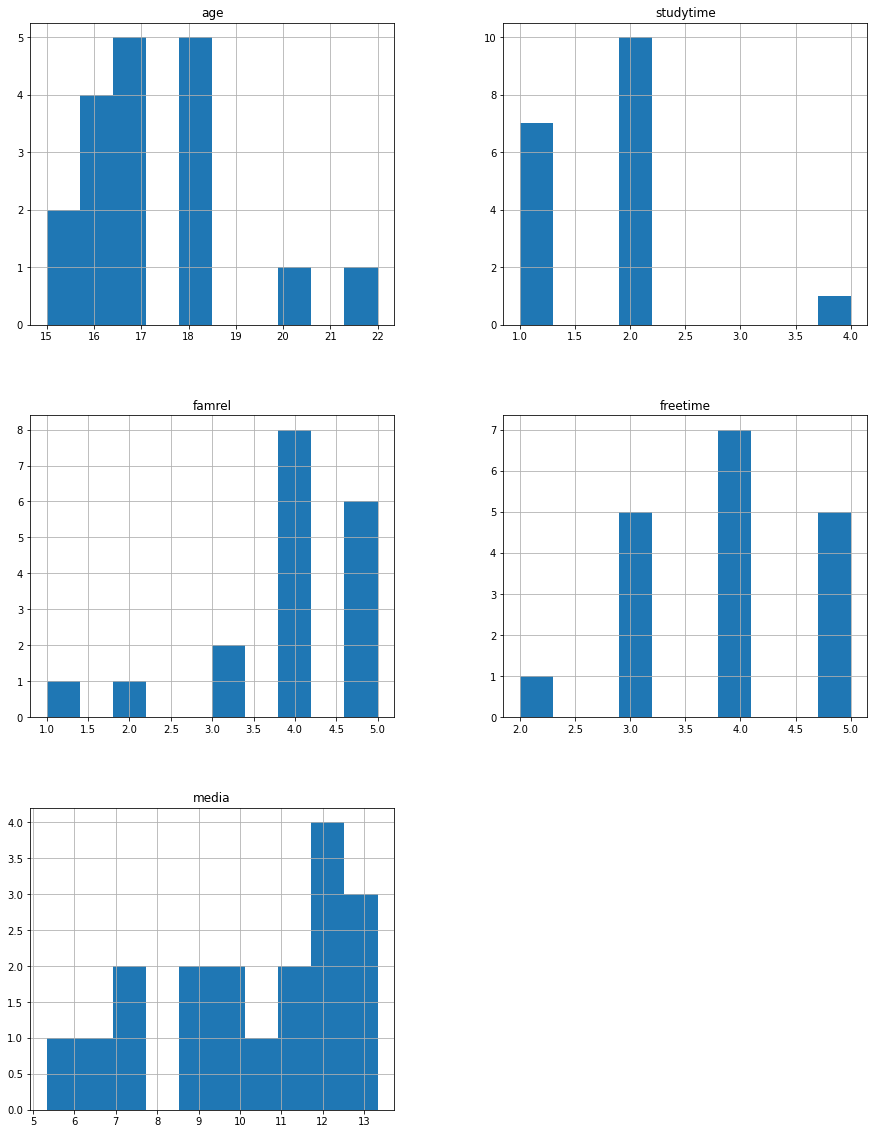

In [117]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
amostra.hist(ax = ax)
plt.show()

In [ ]:
plt.scatter(mat_stud['Dalc'],mat_stud['media'])
plt.show()